In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import splitwavepy as sw

import scipy
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Method:

1) Split wave using set parameters, lots of noise, and variable polarisation.

2) Try to recover the splitting parameters by error surface stacking.

In [3]:
# 1. Generate Synthetic Data

noise_level = 0.1
fast = 0.
lag = 2.
delta = 0.1

listM = [ sw.EigenM(pol=np.random.randint(360),
                    noise=noise_level,
                    split = (fast, lag),
                    delta = delta,
                    lags=(4,)) for _ in range(40) ]

# 2. Collect in Stack

S = sw.measure.Stack(listM)

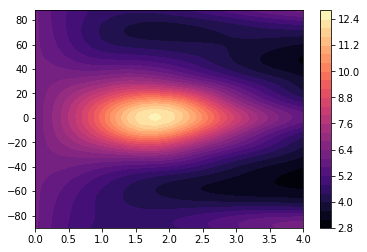

In [4]:
# 3. Plot

cax = plt.contourf(S.lags,S.degs,S.stack(),26,cmap='magma')
plt.colorbar(cax)
plt.show()

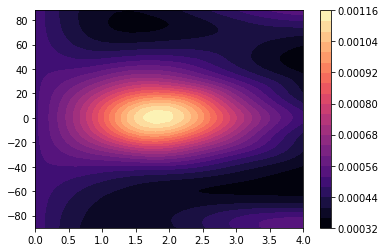

In [5]:
cax = plt.contourf(S.lags,S.degs,S.stackpdf(),26,cmap='magma')
plt.colorbar(cax)
plt.show()

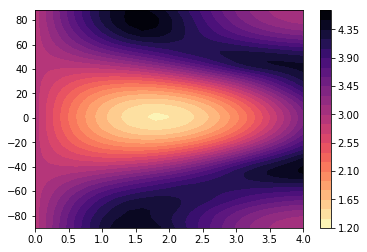

In [6]:
cax = plt.contourf(S.lags,S.degs,S.wolfe_silver(),26,cmap='magma_r')
plt.colorbar(cax)
plt.show()

In [7]:
cax = plt.contourf(S.lags,S.degs,S.restivo_helffrich(),26,cmap='magma_r')
plt.colorbar(cax)
plt.show()

AttributeError: 'Pair' object has no attribute 'snrRH'

In [ ]:
# 1. Generate Synthetic Data with variable noise

# noise_level = 0.1
fast = 0.
lag = 2.
delta = 0.1

listM = [ sw.EigenM(pol=np.random.randint(360),
                    noise=0.2*np.random.rand(1),
                    split = (fast,lag),
                    delta = delta,
                    lags=(4,)) for _ in range(40) ]

# 2. Collect in Stack

S = sw.eigval.Stack(listM)

In [ ]:
# 3. Plot

cax = plt.contourf(S.lags,S.degs,S.stack(),26,cmap='magma')
plt.colorbar(cax)
plt.show()

In [ ]:
cax = plt.contourf(S.lags,S.degs,S.stackpdf(),26,cmap='magma')
plt.colorbar(cax)
plt.show()

In [ ]:
cax = plt.contourf(S.lags,S.degs,S.wolfe_silver(),26,cmap='magma_r')
plt.colorbar(cax)
plt.show()

In [ ]:
cax=plt.contourf(S.lags,S.degs,S.restivo_helffrich(),26,cmap='magma_r')
plt.colorbar(cax)
plt.show()

In [ ]:
def sigmoid (x): return 1/(1 + np.exp(-x))

In [ ]:
x = np.linspace(0,22,300)
plt.plot(x,sigmoid(2*x-10))

In [ ]:
a = sw.Pair()
b = a.copy()
b.rotateto(b.pol())
b.chop()


In [ ]:
a.snrRH()

In [ ]:
a.rotateto(a.pol())

In [ ]:
dat